In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [3]:
class MultiArmedBandit:
    def __init__(self, k=10):
        self.k = k  # Number of arms
        self.q_true = np.random.normal(0, 1, k)  # True reward values
        self.n = np.zeros(k)  # Action counts
        self.q_est = np.zeros(k)  # Estimated values
    
    def step(self, action):
        reward = np.random.normal(self.q_true[action], 1)  # Reward
        self.n[action] += 1
        return reward



In [5]:
def ucb(bandit, steps=1000, c=2):
    rewards = np.zeros(steps)
    for t in range(steps):
        if 0 in bandit.n:
            action = np.argmin(bandit.n)
        else:
            ucb_values = bandit.q_est + c * np.sqrt(np.log(t+1) / bandit.n)
            action = np.argmax(ucb_values)
        reward = bandit.step(action)
        rewards[t] = reward
        bandit.q_est[action] += (reward - bandit.q_est[action]) / bandit.n[action]
    return rewards



In [7]:
# Running UCB experiment
bandit = MultiArmedBandit(k=10)
steps = 1000
rewards_ucb = ucb(bandit, steps, c=2)



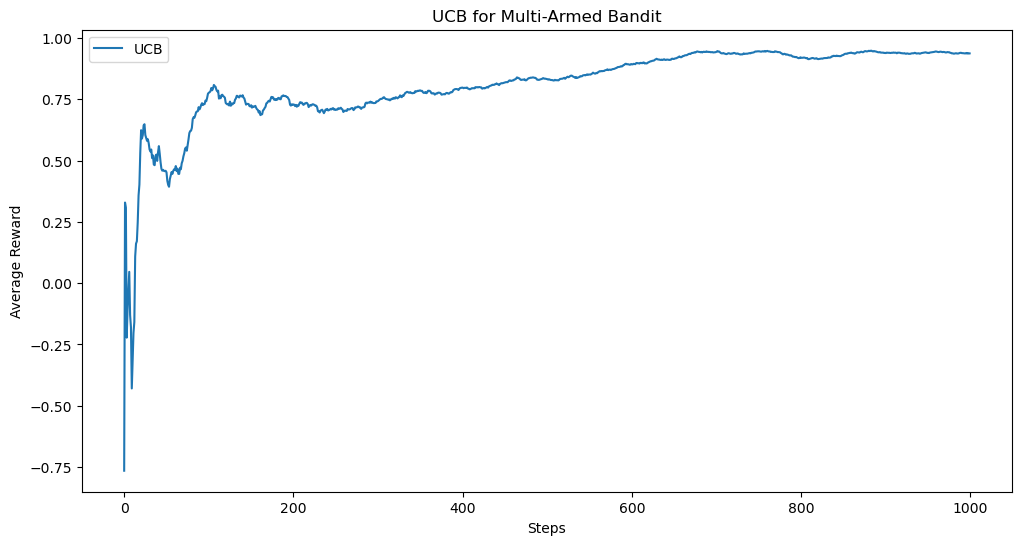

In [9]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(rewards_ucb) / np.arange(1, steps+1), label='UCB')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.title('UCB for Multi-Armed Bandit')
plt.show()
